<a href="https://colab.research.google.com/github/iKurito/Awesome-Profile-README-templates/blob/master/entregable-03-grupo-01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importación de librerías

In [ ]:
# Comandos para instalar packages localmente
#%pip install xgboost

  Using cached xgboost-2.0.3-py3-none-macosx_12_0_arm64.whl.metadata (2.0 kB)
Using cached xgboost-2.0.3-py3-none-macosx_12_0_arm64.whl (1.9 MB)
Note: you may need to restart the kernel to use updated packages.


In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import warnings
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import xgboost as xgb
import lightgbm as lgb
import pickle

from tqdm.notebook import tqdm
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, BaggingRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, accuracy_score, roc_auc_score
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder, PolynomialFeatures, StandardScaler, MinMaxScaler

warnings.filterwarnings("ignore")

# Inicialización de la data



## 1. Lectura de Dataset

In [ ]:
# Dataset con el cual entrenaremos nuestro modelo

#Rafael Ballester-Ripoll, Enrique G. Paredes, Renato Pajarola.
#Sobol Tensor Trains for Global Sensitivity Analysis.
#In arXiv Computer Science / Numerical Analysis e-prints, 2017
#(https://128.84.21.199/abs/1712.00233).

#Cedric Nugteren and Valeriu Codreanu. CLTune: A Generic Auto-Tuner for OpenCL Kernels.
#In: MCSoC: 9th International Symposium on Embedded Multicore/Many-core Systems-on-Chip. IEEE, 2015
#(http://ieeexplore.ieee.org/document/7328205/)

raw_data_url = 'https://raw.githubusercontent.com/daneelsan/INF648-Project/main/dataset/sgemm_product.csv'
raw_data = pd.read_csv(raw_data_url);
raw_data.head()

,MWG,NWG,KWG,MDIMC,NDIMC,MDIMA,NDIMB,KWI,VWM,VWN,STRM,STRN,SA,SB,Run1 (ms),Run2 (ms),Run3 (ms),Run4 (ms)
0,16,16,16,8,8,8,8,2,1,1,0,0,0,0,115.26,115.87,118.55,115.80
1,16,16,16,8,8,8,8,2,1,1,0,0,0,1,78.13,78.25,79.25,79.19
2,16,16,16,8,8,8,8,2,1,1,0,0,1,0,79.84,80.69,80.76,80.97
3,16,16,16,8,8,8,8,2,1,1,0,0,1,1,84.32,89.90,86.75,85.58
4,16,16,16,8,8,8,8,2,1,1,0,1,0,0,115.13,121.98,122.73,114.81


# Exploración de los datos

## 1. Estadísticas descriptivas

In [ ]:
# Dimension de la data
raw_data.shape

(241600, 18)

In [ ]:
# Tipos de datos para cada columna
raw_data.dtypes

MWG            int64
NWG            int64
KWG            int64
MDIMC          int64
NDIMC          int64
MDIMA          int64
NDIMB          int64
KWI            int64
VWM            int64
VWN            int64
STRM           int64
STRN           int64
SA             int64
SB             int64
Run1 (ms)    float64
Run2 (ms)    float64
Run3 (ms)    float64
Run4 (ms)    float64
dtype: object

In [ ]:
# Valores estadísticos para cada columna
raw_data.describe()

,MWG,NWG,KWG,MDIMC,NDIMC,MDIMA,NDIMB,KWI,VWM,VWN,STRM,STRN,SA,SB,Run1 (ms),Run2 (ms),Run3 (ms),Run4 (ms)
count,241600.000000,241600.000000,241600.000000,241600.000000,241600.000000,241600.000000,241600.000000,241600.000000,241600.000000,241600.000000,241600.000000,241600.000000,241600.000000,241600.000000,241600.000000,241600.000000,241600.000000,241600.000000
mean,80.415364,80.415364,25.513113,13.935894,13.935894,17.371126,17.371126,5.000000,2.448609,2.448609,0.500000,0.500000,0.500000,0.500000,217.647852,217.579536,217.532756,217.527669
std,42.469220,42.469220,7.855619,7.873662,7.873662,9.389418,9.389418,3.000006,1.953759,1.953759,0.500001,0.500001,0.500001,0.500001,369.012422,368.677309,368.655118,368.677413
min,16.000000,16.000000,16.000000,8.000000,8.000000,8.000000,8.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,13.290000,13.250000,13.360000,13.370000
25%,32.000000,32.000000,16.000000,8.000000,8.000000,8.000000,8.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,40.660000,40.710000,40.660000,40.640000
50%,64.000000,64.000000,32.000000,8.000000,8.000000,16.000000,16.000000,5.000000,2.000000,2.000000,0.500000,0.500000,0.500000,0.500000,69.825000,69.930000,69.790000,69.820000
75%,128.000000,128.000000,32.000000,16.000000,16.000000,32.000000,32.000000,8.000000,4.000000,4.000000,1.000000,1.000000,1.000000,1.000000,228.530000,228.310000,228.320000,228.320000
max,128.000000,128.000000,32.000000,32.000000,32.000000,32.000000,32.000000,8.000000,8.000000,8.000000,1.000000,1.000000,1.000000,1.000000,3339.630000,3375.420000,3397.080000,3361.710000


In [ ]:
# Valores únicos de cada columna
raw_data.nunique()

MWG              4
NWG              4
KWG              2
MDIMC            3
NDIMC            3
MDIMA            3
NDIMB            3
KWI              2
VWM              4
VWN              4
STRM             2
STRN             2
SA               2
SB               2
Run1 (ms)    58161
Run2 (ms)    58269
Run3 (ms)    58264
Run4 (ms)    58154
dtype: int64

In [ ]:
# Existencia de valores nulos para cada columna
raw_data.isnull().any()

MWG          False
NWG          False
KWG          False
MDIMC        False
NDIMC        False
MDIMA        False
NDIMB        False
KWI          False
VWM          False
VWN          False
STRM         False
STRN         False
SA           False
SB           False
Run1 (ms)    False
Run2 (ms)    False
Run3 (ms)    False
Run4 (ms)    False
dtype: bool

## 2. Visualización de datos

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración de estilo para los gráficos
sns.set(style="whitegrid")

### 2.1 Variables con alta desviación

In [ ]:
def graph_dist_column(col):
  print(raw_data[col].sort_values(ascending=True).value_counts(sort = False))
  plt.figure(figsize=(10, 6))
  plt.hist(raw_data[col], bins=100, color='lightgreen', edgecolor='black')
  plt.title('Distribution of ' + col)
  plt.xlabel(col)
  plt.ylabel('Frequency')
  plt.grid(True)
  plt.show()

MWG
16     18944
32     47264
64     75584
128    99808
Name: count, dtype: int64


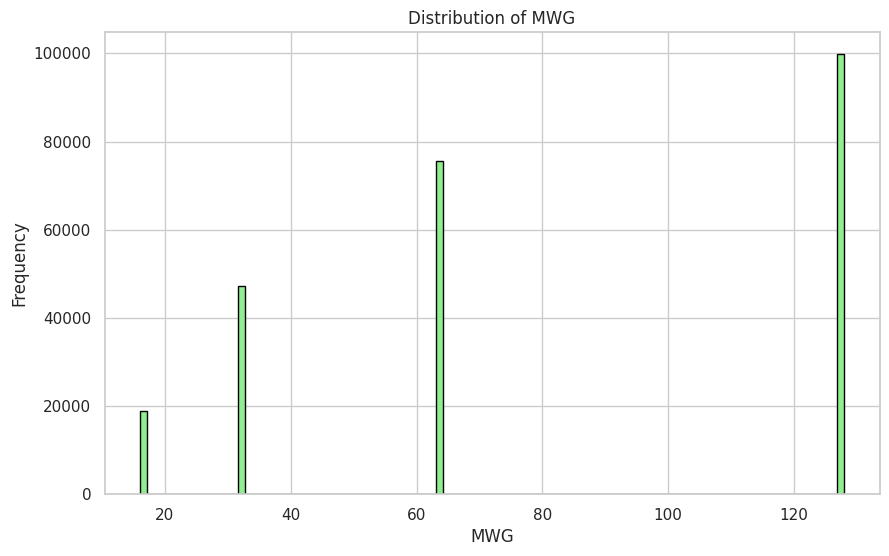

NWG
16     18944
32     47264
64     75584
128    99808
Name: count, dtype: int64


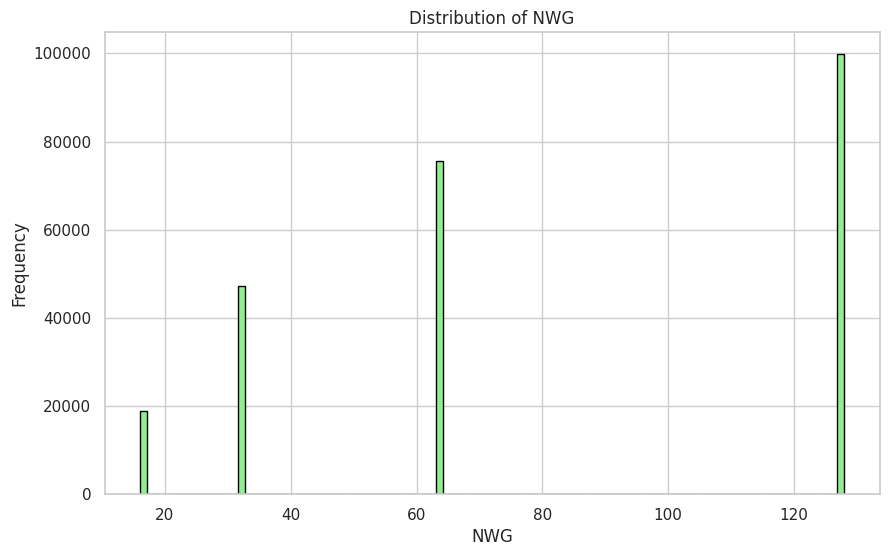

In [ ]:
# Se evalúan los valores numéricos con desviación estándar muy alta
graph_dist_column('MWG')
graph_dist_column('NWG')

### 2.2 Histograma

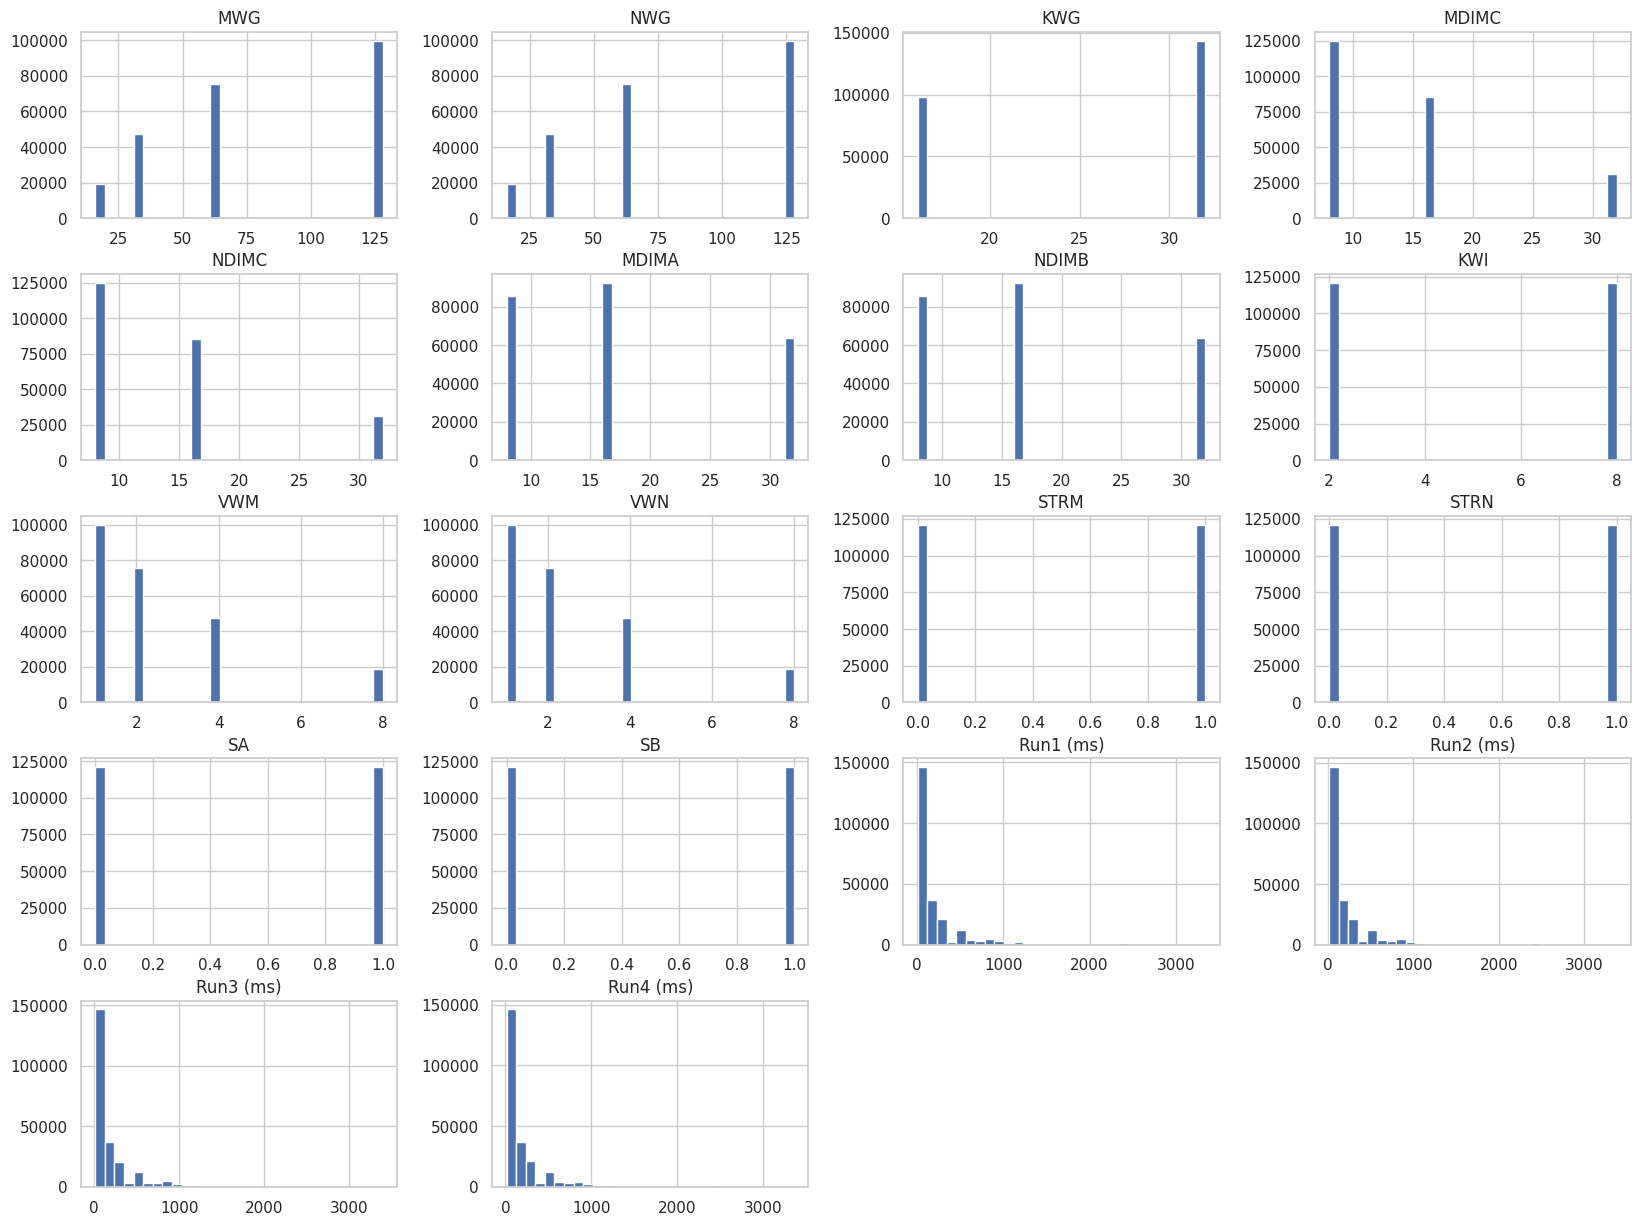

In [ ]:
# Histograma para cada columna
raw_data.hist(bins=30, figsize=(20, 15))
plt.show()

### 2.3. Diagrama de cajas

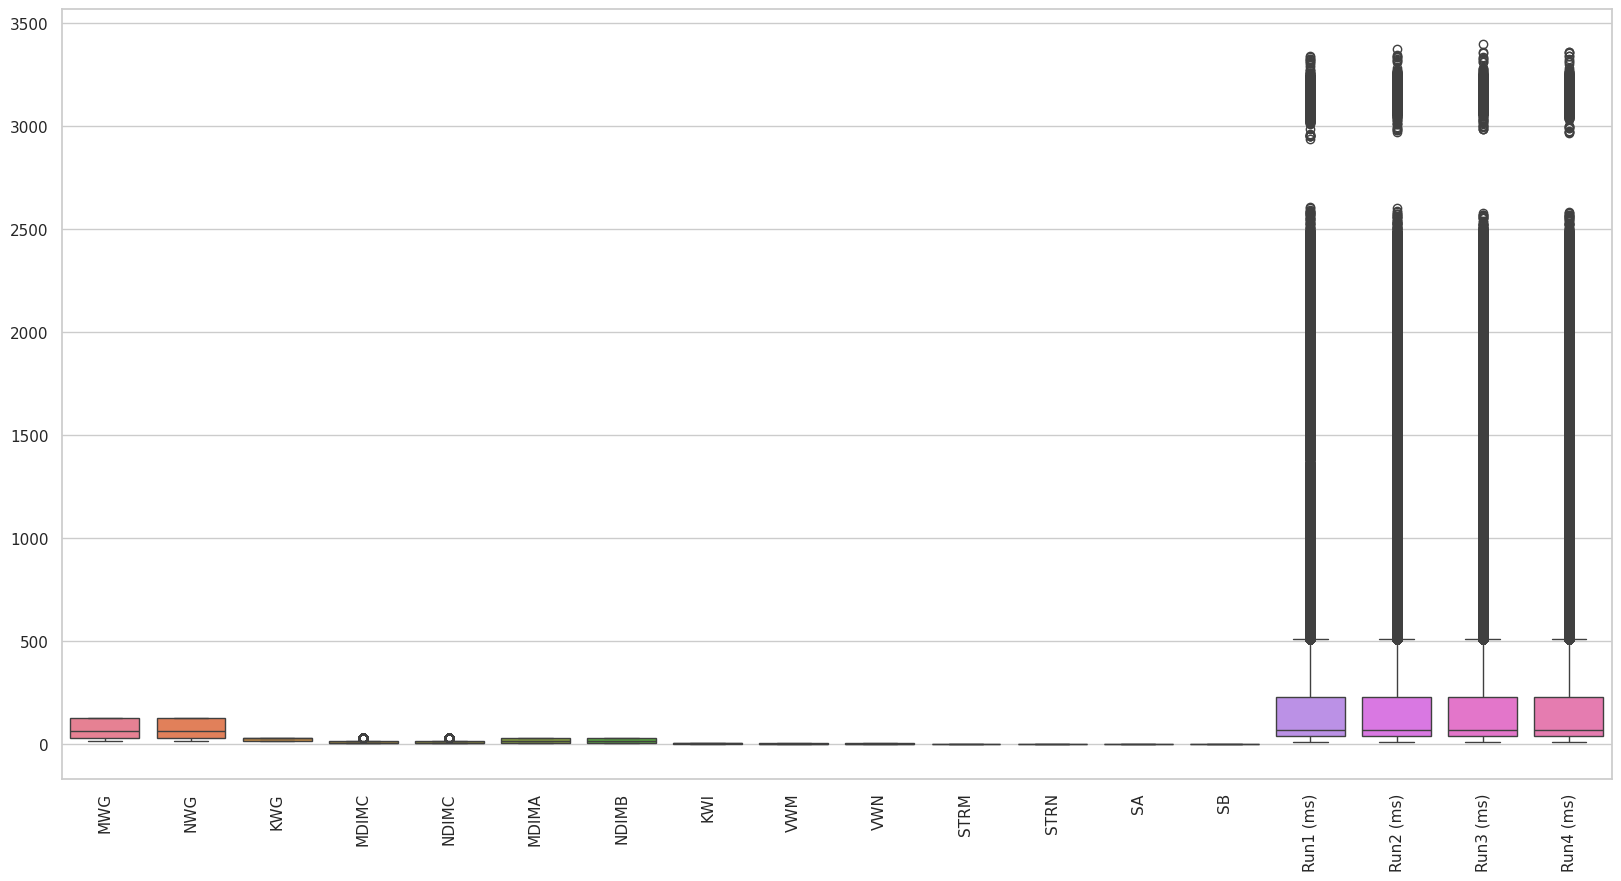

In [ ]:
# Diagrama de cajas para visualizar valores atípicos
plt.figure(figsize=(20, 10))
sns.boxplot(data=raw_data)
plt.xticks(rotation=90)
plt.show()

### 2.4. Mapa de calor

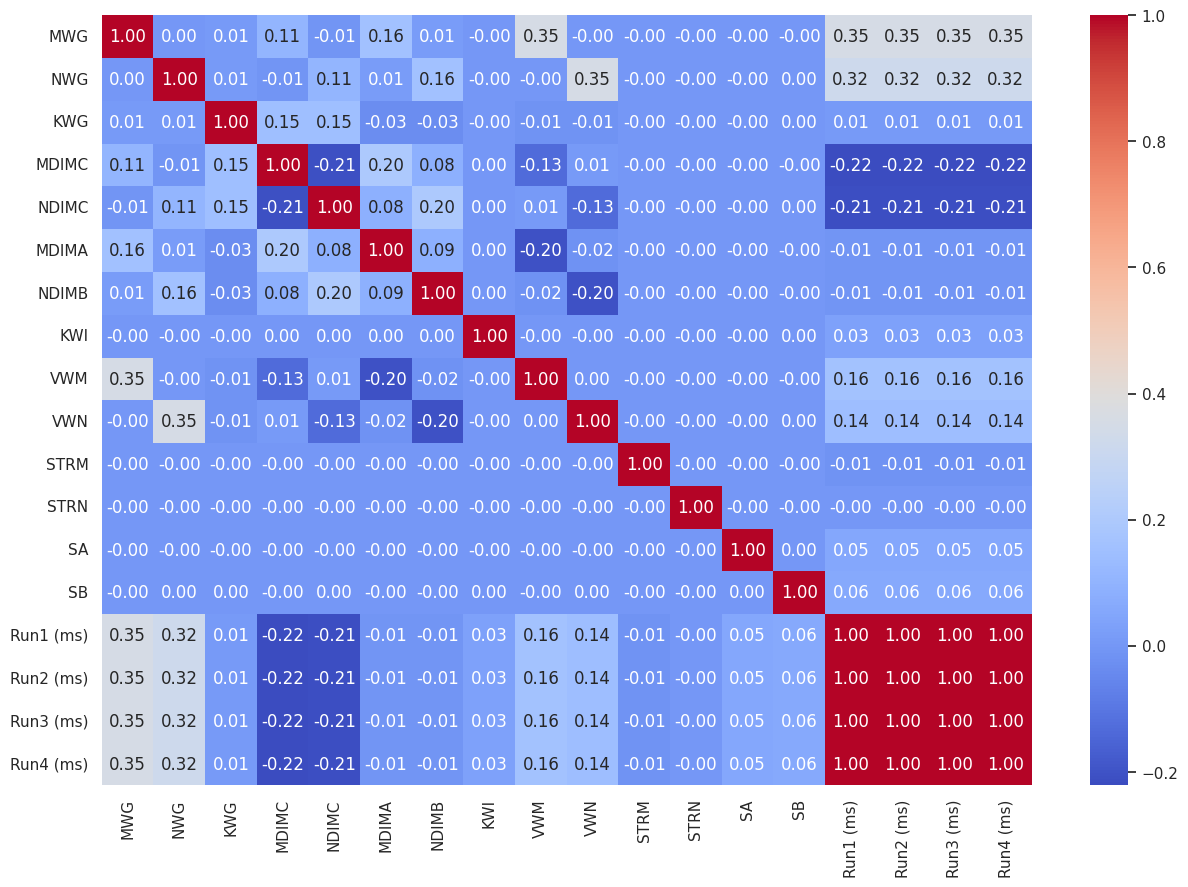

In [ ]:
# Mapa de calor de la correlación entre las variables
plt.figure(figsize=(15, 10))
corr_matrix = raw_data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

### 2.5. Distribución de los tiempos de ejecución

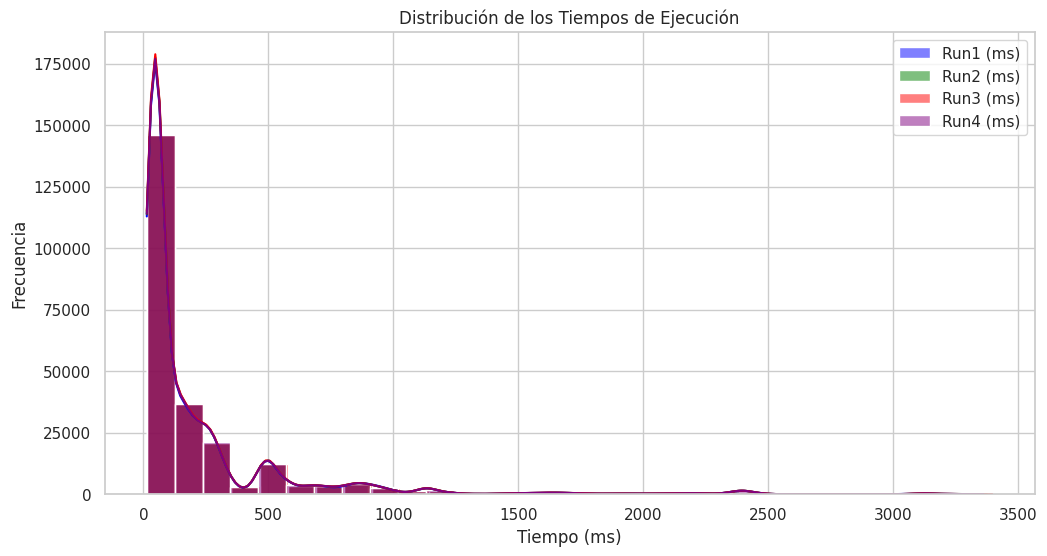

In [ ]:
# Histograma específico para los tiempos de ejecución
plt.figure(figsize=(12, 6))
sns.histplot(raw_data['Run1 (ms)'], bins=30, kde=True, color='blue', label='Run1 (ms)')
sns.histplot(raw_data['Run2 (ms)'], bins=30, kde=True, color='green', label='Run2 (ms)')
sns.histplot(raw_data['Run3 (ms)'], bins=30, kde=True, color='red', label='Run3 (ms)')
sns.histplot(raw_data['Run4 (ms)'], bins=30, kde=True, color='purple', label='Run4 (ms)')
plt.legend()
plt.title('Distribución de los Tiempos de Ejecución')
plt.xlabel('Tiempo (ms)')
plt.ylabel('Frecuencia')
plt.show()

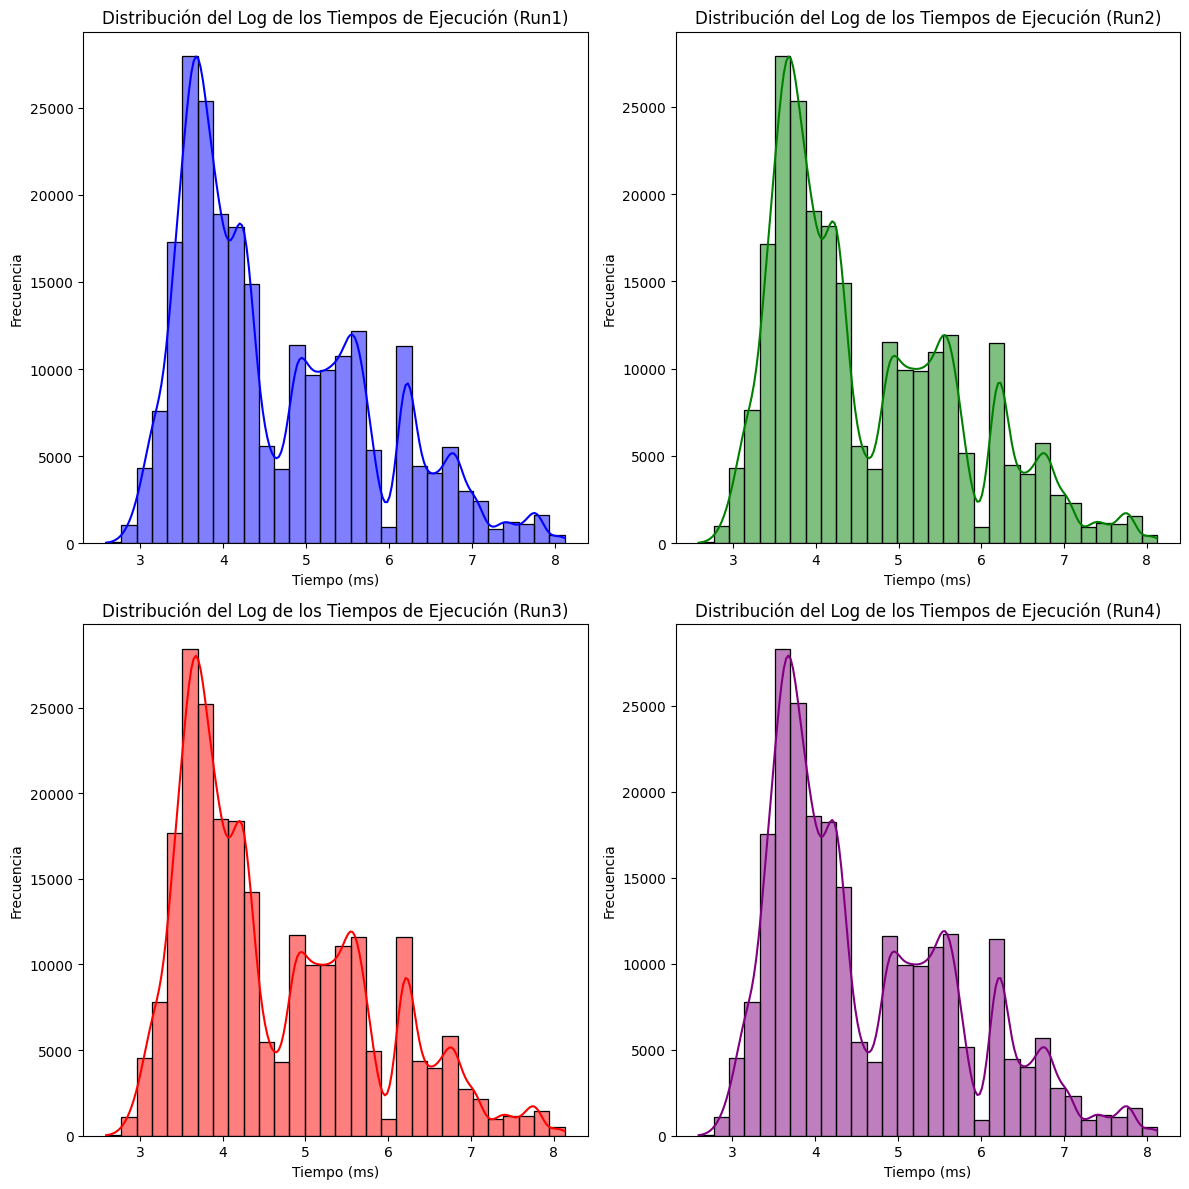

In [ ]:
# Crear gráficos separados para cada tiempo de ejecución
fig, axes = plt.subplots(2, 2, figsize=(12, 12))

# Histograma para Run1 (ms)
sns.histplot(np.log(raw_data['Run1 (ms)']), bins=30, kde=True, color='blue', ax=axes[0, 0])
axes[0, 0].set_title('Distribución del Log de los Tiempos de Ejecución (Run1)')
axes[0, 0].set_xlabel('Tiempo (ms)')
axes[0, 0].set_ylabel('Frecuencia')

# Histograma para Run2 (ms)
sns.histplot(np.log(raw_data['Run2 (ms)']), bins=30, kde=True, color='green', ax=axes[0, 1])
axes[0, 1].set_title('Distribución del Log de los Tiempos de Ejecución (Run2)')
axes[0, 1].set_xlabel('Tiempo (ms)')
axes[0, 1].set_ylabel('Frecuencia')

# Histograma para Run3 (ms)
sns.histplot(np.log(raw_data['Run3 (ms)']), bins=30, kde=True, color='red', ax=axes[1, 0])
axes[1, 0].set_title('Distribución del Log de los Tiempos de Ejecución (Run3)')
axes[1, 0].set_xlabel('Tiempo (ms)')
axes[1, 0].set_ylabel('Frecuencia')

# Histograma para Run4 (ms)
sns.histplot(np.log(raw_data['Run4 (ms)']), bins=30, kde=True, color='purple', ax=axes[1, 1])
axes[1, 1].set_title('Distribución del Log de los Tiempos de Ejecución (Run4)')
axes[1, 1].set_xlabel('Tiempo (ms)')
axes[1, 1].set_ylabel('Frecuencia')

plt.tight_layout()
plt.show()

# Preprocesamiento de datos

## 1. Limpieza de datos

No es necesario realizar una limpieza de los datos como tal.
No existen valores nulos en la data y todos los valores están bien definidos.
Lo que sí se realizará será aplicar el logaritmo a los valores a predecir (los tiempos de ejecución).

## 2. Definir variable objetivo

In [ ]:
# Trabajemos con una copia del dataset
data = raw_data.copy();

Las últimas cuatro columnas son las variables objetivo (Run1 (ms), Run2 (ms), Run3 (ms), Run4 (ms)).  Creamos una variable objetivo única que es el promedio de estos tiempos de ejecución. Elegimos usar el promedio porque nos da una medida central del rendimiento en los cuatro ensayos, y nos permite simplificar el análisis. Aunque también podríamos haber considerado otras métricas como la desviación estándar, que nos habría dado una idea de la variabilidad en los tiempos de ejecución, para este caso preferimos el promedio ya que buscamos una medida que represente un rendimiento típico.

In [ ]:
# Las últimas cuatro columnas son las variables objetivo (Run1 (ms), Run2 (ms), Run3 (ms), Run4 (ms))
# Crear una variable objetivo única como el logaritmo del promedio de estos tiempos de ejecución
data['average_run'] = data[['Run1 (ms)', 'Run2 (ms)', 'Run3 (ms)', 'Run4 (ms)']].mean(axis=1)
data['log_average_run'] = np.log(data['average_run'])

In [ ]:
# Eliminar las columnas de tiempos de ejecución originales y la columna 'average_run'
data = data.drop(columns=['Run1 (ms)', 'Run2 (ms)', 'Run3 (ms)', 'Run4 (ms)', 'average_run'])

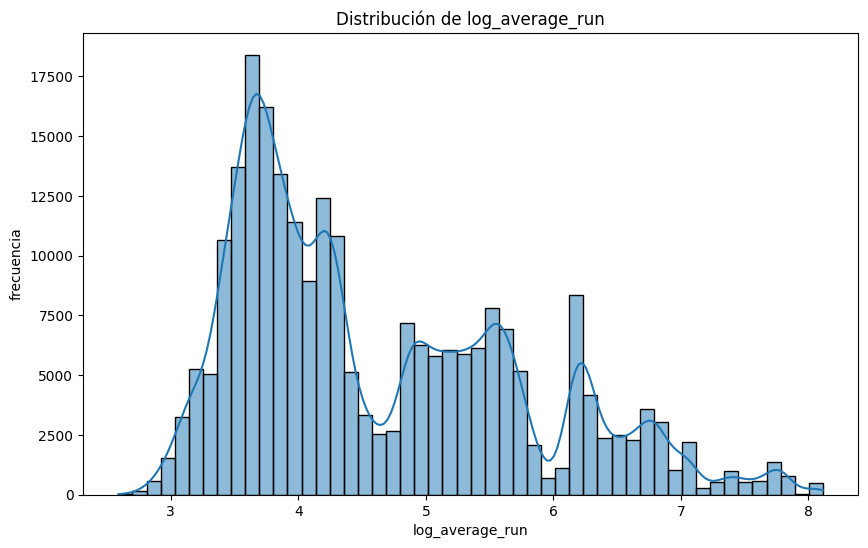

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data['log_average_run'], bins=50, kde=True)
plt.title('Distribución de log_average_run')
plt.xlabel('log_average_run')
plt.ylabel('frecuencia')
plt.show()

## 3. Separar data de entrenamiento y prueba

In [ ]:
# Características y objetivo
X = data.drop(columns=['log_average_run'])
y = data['log_average_run']

In [ ]:
X.head()

,MWG,NWG,KWG,MDIMC,NDIMC,MDIMA,NDIMB,KWI,VWM,VWN,STRM,STRN,SA,SB
0,16,16,16,8,8,8,8,2,1,1,0,0,0,0
1,16,16,16,8,8,8,8,2,1,1,0,0,0,1
2,16,16,16,8,8,8,8,2,1,1,0,0,1,0
3,16,16,16,8,8,8,8,2,1,1,0,0,1,1
4,16,16,16,8,8,8,8,2,1,1,0,1,0,0


In [ ]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 4. Análisis de Componentes Principales

In [ ]:
# Estandarizar las características
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
# Aplicar PCA
pca = PCA(n_components=2)  # Reducimos a 2 componentes principales para visualización
X_pca = pca.fit_transform(X_scaled)

In [ ]:
# Crear un DataFrame con los resultados de PCA
pca_df = pd.DataFrame(data=X_pca, columns=['Componente Principal 1', 'Componente Principal 2'])
pca_df['log_average_run'] = y.values

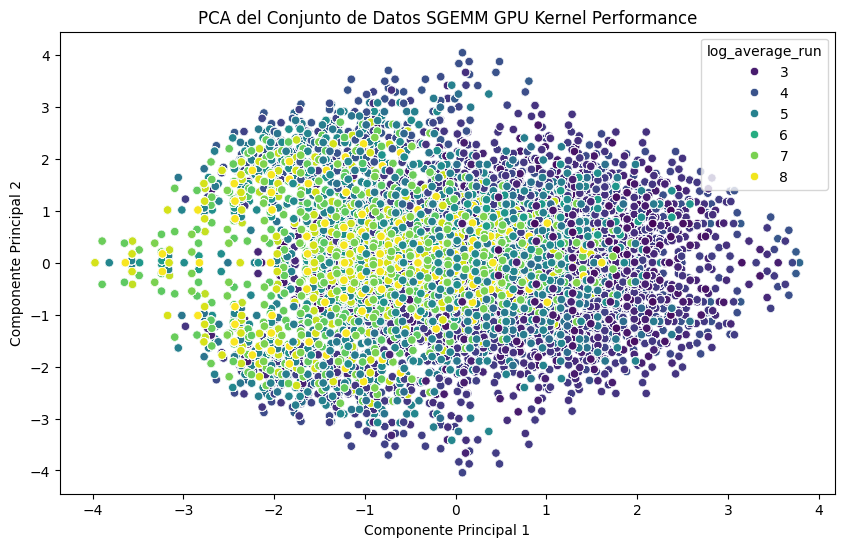

In [ ]:
# Visualizar los resultados de PCA
plt.figure(figsize=(10, 6))
sns.scatterplot(data=pca_df, x='Componente Principal 1', y='Componente Principal 2', hue='log_average_run', palette='viridis')
plt.title('PCA del Conjunto de Datos SGEMM GPU Kernel Performance')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.show()

In [ ]:
# Variancia explicada por cada componente principal
explained_variance = pca.explained_variance_ratio_
print(f"Varianza explicada por la primera componente principal: {explained_variance[0]:.2f}")
print(f"Varianza explicada por la segunda componente principal: {explained_variance[1]:.2f}")

Varianza explicada por la primera componente principal: 0.10
Varianza explicada por la segunda componente principal: 0.10


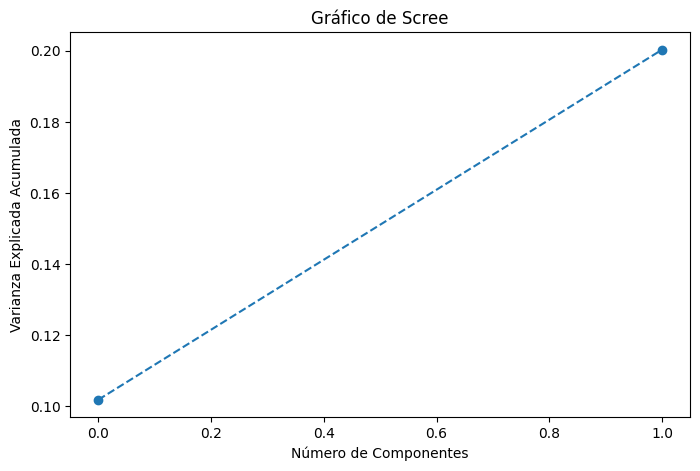

In [ ]:
# Gráfico de scree plot
plt.figure(figsize=(8, 5))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o', linestyle='--')
plt.xlabel('Número de Componentes')
plt.ylabel('Varianza Explicada Acumulada')
plt.title('Gráfico de Scree')
plt.show()

## 5. Identificación de Parámetros Críticos

1.   Entrenamiento de un Modelo de Random Forest: Este modelo es útil porque proporciona una medida directa de la importancia de cada característica.
2.   Cálculo de Importancias de Características: Extraer la importancia de cada característica desde el modelo de Random Forest.

Este análisis nos permitirá identificar cuáles de los 14 parámetros tienen el mayor impacto en el tiempo de ejecución, proporcionando una visión general (con Random Forest).

In [ ]:
# Estandarizar las características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Entrenar un modelo de Random Forest
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train_scaled, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
# Calcular la importancia de las características
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

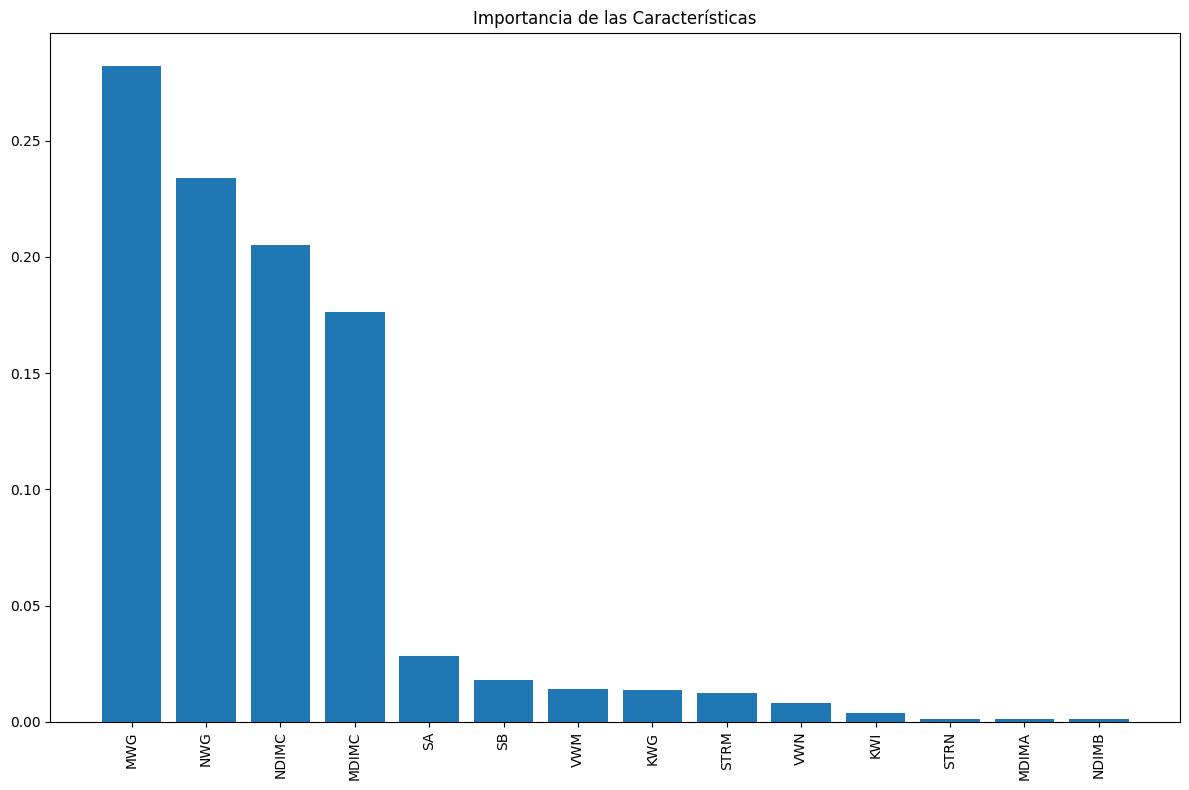

In [ ]:
# Visualizar la importancia de las características
plt.figure(figsize=(12, 8))
plt.title('Importancia de las Características')
plt.bar(range(X_train.shape[1]), importances[indices], align='center')
plt.xticks(range(X_train.shape[1]), X.columns[indices], rotation=90)
plt.tight_layout()
plt.show()

# Ejecución de Modelos

In [ ]:
#Función para graficar resultados
def plot_model_predictions(y_true, y_pred, title):
    plt.figure(figsize=(10, 6))
    plt.scatter(y_true, y_pred, alpha=0.5)
    plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'k--', lw=2)
    plt.xlabel('Valores Reales')
    plt.ylabel('Predicciones')
    plt.title(title)
    plt.show()

In [ ]:
# Guardar la información de los modelos en un diccionario
model_info = {}

# Función para almacenar información sobre modelos
def store_model_info(model_name, ECM_train, ECM_test, R2_train, R2_test):
    model_info[model_name] = {
      "ECM_train": ECM_train,
      "ECM_test": ECM_test,
      "R2_train": R2_train,
      "R2_test": R2_test
    }
    print("Error cuadrático medio (entrenamiento):", model_info[model_name]['ECM_train'])
    print("Error cuadrático medio (prueba):", model_info[model_name]['ECM_test'])
    print("Coeficiente de determinación R^2 (entrenamiento):", model_info[model_name]['R2_train'])
    print("Coeficiente de determinación R^2 (prueba):", model_info[model_name]['R2_test'])

In [ ]:
# Serializar y guardar un objeto
def pickle_dump(obj, file_name):
  with open(file_name, 'wb') as file:
    pickle.dump(obj, file)

# Derializar y cargar un objeto
def pickle_load(file_name):
  with open(file_name, 'rb') as file:
    return pickle.load(file)

In [ ]:
def dump_model_info():
  pickle_dump(model_info, './notebooks/pickle/model_info.pkl')

def load_model_info():
  model_info = pickle_load('./notebooks/pickle/model_info.pkl')

## 1. Regresión Lineal

In [ ]:
# Crear un pipeline para la regresión lineal
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', LinearRegression())
])

# Entrenar el modelo
pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('regressor', LinearRegression())])

In [ ]:
# Predicciones en el conjunto de prueba
y_pred_test_lineal = pipeline.predict(X_test)

# Calcular el MSE y R^2
mse_lineal_test = mean_squared_error(y_test, y_pred_test_lineal)
r2_lineal_test = r2_score(y_test, y_pred_test_lineal)

In [ ]:
# Predicciones en el conjunto de entrenamiento
y_pred_train_lineal = pipeline.predict(X_train)

# Calcular el MSE y R^2
mse_lineal_train = mean_squared_error(y_train, y_pred_train_lineal)
r2_lineal_train = r2_score(y_train, y_pred_train_lineal)

In [ ]:
# Almacenamos la información del modelo
store_model_info('Regresión Lineal', mse_lineal_train, mse_lineal_test, r2_lineal_train, r2_lineal_test)

Error cuadrático medio (entrenamiento): 0.5591461445465075
Error cuadrático medio (prueba): 0.5575853891963406
Coeficiente de determinación R^2 (entrenamiento): 0.5620506628562647
Coeficiente de determinación R^2 (prueba): 0.5577962484740613


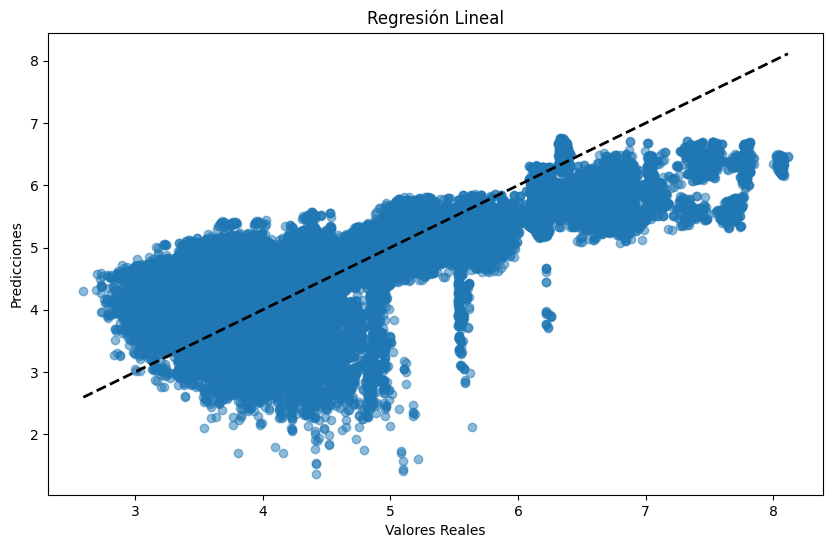

In [ ]:
plot_model_predictions(y_test, y_pred_test_lineal, 'Regresión Lineal')

Después de construir un modelo de regresión lineal, utilizamos los modelos de regresión Ridge y Lasso para optimizar y mejorar el rendimiento del modelo.

## 2. Regresión Ridge

In [ ]:
# Definir los parámetros para Grid Search
ridge_params = {
    'ridge__alpha': [0.1, 1.0, 10.0, 100.0, 1000.0]
}

# Crear el pipeline para Ridge
ridge_pipeline = make_pipeline(StandardScaler(), Ridge())

# Crear GridSearchCV para Ridge
ridge_grid = GridSearchCV(ridge_pipeline, param_grid=ridge_params, cv=5, scoring='r2', verbose=3)
ridge_grid.fit(X_train, y_train)

# Obtener los mejores parámetros y el mejor score
best_ridge_params = ridge_grid.best_params_
best_ridge_score = ridge_grid.best_score_

print("Mejores parámetros para Ridge:", best_ridge_params)
print("Mejor puntaje R² para Ridge:", best_ridge_score)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV 1/5] END ..................ridge__alpha=0.1;, score=0.565 total time=   0.1s
[CV 2/5] END ..................ridge__alpha=0.1;, score=0.561 total time=   0.0s
[CV 3/5] END ..................ridge__alpha=0.1;, score=0.563 total time=   0.0s
[CV 4/5] END ..................ridge__alpha=0.1;, score=0.555 total time=   0.0s
[CV 5/5] END ..................ridge__alpha=0.1;, score=0.566 total time=   0.0s
[CV 1/5] END ..................ridge__alpha=1.0;, score=0.565 total time=   0.0s
[CV 2/5] END ..................ridge__alpha=1.0;, score=0.561 total time=   0.0s
[CV 3/5] END ..................ridge__alpha=1.0;, score=0.563 total time=   0.0s
[CV 4/5] END ..................ridge__alpha=1.0;, score=0.555 total time=   0.0s
[CV 5/5] END ..................ridge__alpha=1.0;, score=0.566 total time=   0.0s
[CV 1/5] END .................ridge__alpha=10.0;, score=0.565 total time=   0.0s
[CV 2/5] END .................ridge__alpha=10.0;,

In [ ]:
# Reentrenar Ridge con el mejor parámetro
best_ridge_model = make_pipeline(StandardScaler(), Ridge(alpha=best_ridge_params['ridge__alpha']))
best_ridge_model.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()), ('ridge', Ridge())])

In [ ]:
# Predicciones en el conjunto de prueba
y_pred_best_test_ridge = best_ridge_model.predict(X_test)

# Calcular el MSE y R^2
mse_ridge_test = mean_squared_error(y_test, y_pred_best_test_ridge)
r2_ridge_test = r2_score(y_test, y_pred_best_test_ridge)

In [ ]:
# Predicciones en el conjunto de entrenamiento
y_pred_best_train_ridge = best_ridge_model.predict(X_train)

# Calcular el MSE y R^2
mse_ridge_train = mean_squared_error(y_train, y_pred_best_train_ridge)
r2_ridge_train = r2_score(y_train, y_pred_best_train_ridge)

In [ ]:
# Almacenamos la información del modelo
store_model_info('Regresión Ridge', mse_ridge_train, mse_ridge_test, r2_ridge_train, r2_ridge_test)

Error cuadrático medio (entrenamiento): 0.5591461445856309
Error cuadrático medio (prueba): 0.5575853243056191
Coeficiente de determinación R^2 (entrenamiento): 0.5620506628256213
Coeficiente de determinación R^2 (prueba): 0.5577962999368884


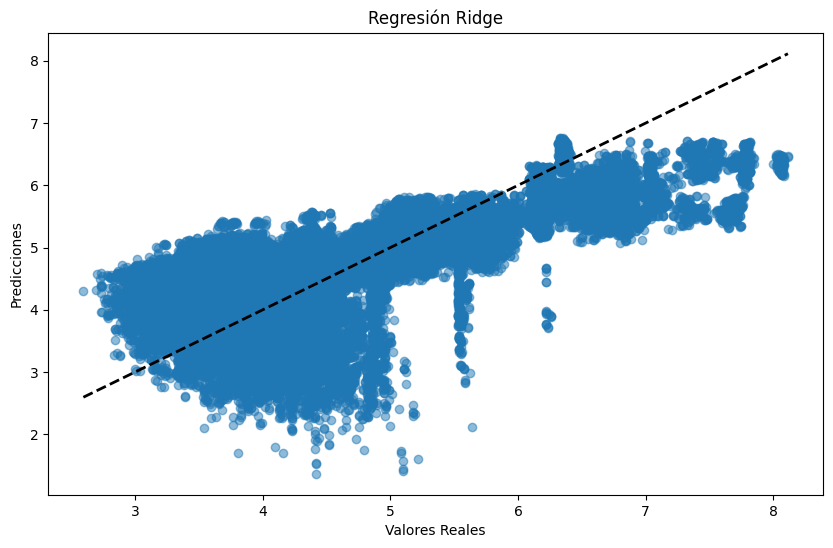

In [ ]:
plot_model_predictions(y_test, y_pred_best_test_ridge, 'Regresión Ridge')

## 3. Regresión Lasso

In [ ]:
# Definir los parámetros para Grid Search
lasso_params = {
    'lasso__alpha': [0.001, 0.01, 0.1, 1.0, 10.0]
}

# Crear el pipeline para Lasso
lasso_pipeline = make_pipeline(StandardScaler(), Lasso())

# Crear GridSearchCV para Lasso
lasso_grid = GridSearchCV(lasso_pipeline, param_grid=lasso_params, cv=5, scoring='r2', verbose=3)
lasso_grid.fit(X_train, y_train)

# Obtener los mejores parámetros y el mejor score
best_lasso_params = lasso_grid.best_params_
best_lasso_score = lasso_grid.best_score_

print("Mejores parámetros para Lasso:", best_lasso_params)
print("Mejor puntaje R² para Lasso:", best_lasso_score)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV 1/5] END ................lasso__alpha=0.001;, score=0.565 total time=   0.1s
[CV 2/5] END ................lasso__alpha=0.001;, score=0.561 total time=   0.1s
[CV 3/5] END ................lasso__alpha=0.001;, score=0.563 total time=   0.1s
[CV 4/5] END ................lasso__alpha=0.001;, score=0.555 total time=   0.1s
[CV 5/5] END ................lasso__alpha=0.001;, score=0.566 total time=   0.2s
[CV 1/5] END .................lasso__alpha=0.01;, score=0.564 total time=   0.1s
[CV 2/5] END .................lasso__alpha=0.01;, score=0.560 total time=   0.1s
[CV 3/5] END .................lasso__alpha=0.01;, score=0.562 total time=   0.1s
[CV 4/5] END .................lasso__alpha=0.01;, score=0.554 total time=   0.1s
[CV 5/5] END .................lasso__alpha=0.01;, score=0.564 total time=   0.2s
[CV 1/5] END ..................lasso__alpha=0.1;, score=0.504 total time=   0.1s
[CV 2/5] END ..................lasso__alpha=0.1;,

In [ ]:
# Reentrenar Lasso con el mejor parámetro
best_lasso_model = make_pipeline(StandardScaler(), Lasso(alpha=best_lasso_params['lasso__alpha']))
best_lasso_model.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('lasso', Lasso(alpha=0.001))])

In [ ]:
# Predicciones en el conjunto de prueba
y_pred_best_test_lasso = best_lasso_model.predict(X_test)

# Calcular el MSE y R^2 para los modelos optimizados
mse_lasso_test = mean_squared_error(y_test, y_pred_best_test_lasso)
r2_lasso_test = r2_score(y_test, y_pred_best_test_lasso)

In [ ]:
# Predicciones en el conjunto de entrenamiento
y_pred_best_train_lasso = best_lasso_model.predict(X_train)

# Calcular el MSE y R^2 para los modelos optimizados
mse_lasso_train = mean_squared_error(y_train, y_pred_best_train_lasso)
r2_lasso_train = r2_score(y_train, y_pred_best_train_lasso)

In [ ]:
# Almacenamos la información del modelo
store_model_info('Regresión Lasso', mse_lasso_train, mse_lasso_test, r2_lasso_train, r2_lasso_test)

Error cuadrático medio (entrenamiento): 0.559166518117579
Error cuadrático medio (prueba): 0.5575777279065386
Coeficiente de determinación R^2 (entrenamiento): 0.5620347053252452
Coeficiente de determinación R^2 (prueba): 0.5578023244063895


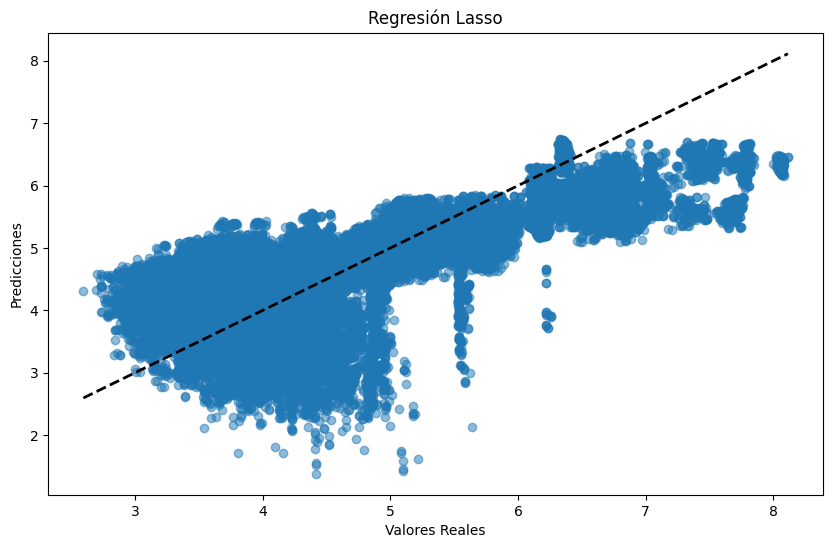

In [ ]:
plot_model_predictions(y_test, y_pred_best_test_lasso, 'Regresión Lasso')

## 4. Regresión Polinómica

In [ ]:
# Definir los grados a probar
degrees_poly = [1, 2, 3]
param_grid_poly = {'poly__degree': degrees_poly}

In [ ]:
# Crear un pipeline para la regresión polinómica
pipeline = Pipeline([
    ('poly', PolynomialFeatures()),
    ('scaler', StandardScaler()), #Estandarizar variables
    ('regressor', LinearRegression()) #Regresión
])

In [ ]:
# Realizar la búsqueda de cuadrícula para encontrar el mejor grado de polinomio
grid_search_poly = GridSearchCV(pipeline, param_grid_poly, cv=5, scoring='neg_mean_squared_error', verbose=3)
grid_search_poly.fit(X_train, y_train)

Fitting 5 folds for each of 3 candidates, totalling 15 fits
[CV 1/5] END ...................poly__degree=1;, score=-0.562 total time=   0.1s
[CV 2/5] END ...................poly__degree=1;, score=-0.561 total time=   0.1s
[CV 3/5] END ...................poly__degree=1;, score=-0.554 total time=   0.1s
[CV 4/5] END ...................poly__degree=1;, score=-0.564 total time=   0.1s
[CV 5/5] END ...................poly__degree=1;, score=-0.556 total time=   0.1s
[CV 1/5] END ...................poly__degree=2;, score=-0.237 total time=   1.9s
[CV 2/5] END ...................poly__degree=2;, score=-0.239 total time=   1.7s
[CV 3/5] END ...................poly__degree=2;, score=-0.237 total time=   1.8s
[CV 4/5] END ...................poly__degree=2;, score=-0.237 total time=   1.7s
[CV 5/5] END ...................poly__degree=2;, score=-0.237 total time=   1.6s
[CV 1/5] END ...................poly__degree=3;, score=-0.153 total time=  22.0s
[CV 2/5] END ...................poly__degree=3;, 

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('poly', PolynomialFeatures()),
                                       ('scaler', StandardScaler()),
                                       ('regressor', LinearRegression())]),
             param_grid={'poly__degree': [1, 2, 3]},
             scoring='neg_mean_squared_error', verbose=3)

In [ ]:
# Reentrenar el modelo con los mejores parámetros
best_poly_model = grid_search_poly.best_estimator_

In [ ]:
# Se capturan las predicciones del modelo
y_pred_train_poly = best_poly_model.predict(X_train)
y_pred_test_poly = best_poly_model.predict(X_test)

In [ ]:
print("Mejor grado de polinomio:", grid_search_poly.best_params_['poly__degree'])

# Almacenamos la información del modelo
store_model_info('Regresión Polinómica', mean_squared_error(y_train, y_pred_train_poly), mean_squared_error(y_test, y_pred_test_poly), r2_score(y_train, y_pred_train_poly), r2_score(y_test, y_pred_test_poly))

Mejor grado de polinomio: 3
Error cuadrático medio (entrenamiento): 0.1512981770514677
Error cuadrático medio (prueba): 0.15194178436126007
Coeficiente de determinación R^2 (entrenamiento): 0.8814962116845384
Coeficiente de determinación R^2 (prueba): 0.8794996634417992


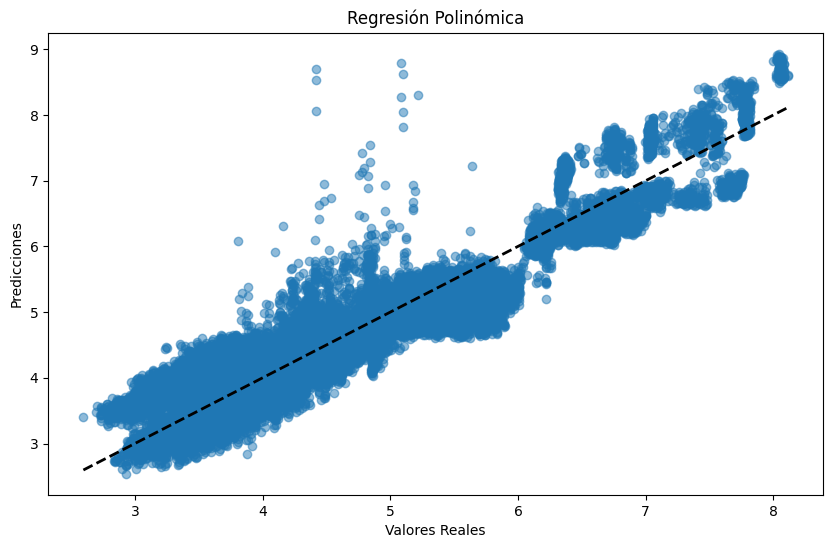

In [ ]:
plot_model_predictions(y_test, y_pred_test_poly, 'Regresión Polinómica')

In [ ]:
# Guardar el modelo
#pickle_dump(best_poly_model, './notebooks/pickle/best_PolynomialRegression_model.pkl')

# Cargar el modelo
#best_poly_model = pickle_load('./notebooks/pickle/best_PolynomialRegression_model.pkl')

In [ ]:
Observación: El polinomio de mayor grado siempre será escogido por el GridSearchCV.
Overfitting.

## 5. Random Forest

In [ ]:
# Se definen los parámetros para el Random Forest
param_grid_rf = {
    'n_estimators': [100, 200], # Número de árboles
    'max_depth': [10, 20, 30] # Profundidad máxima
}

In [ ]:
# Entrena el modelo
n_cv = KFold(n_splits=5) # Número de pliegues
grid_search_rf = GridSearchCV(RandomForestRegressor(random_state=42), param_grid_rf, cv=n_cv, scoring='neg_mean_squared_error', verbose=3)
grid_search_rf.fit(X_train, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV 1/5] END ...max_depth=10, n_estimators=100;, score=-0.026 total time=  16.0s
[CV 2/5] END ...max_depth=10, n_estimators=100;, score=-0.027 total time=  15.9s
[CV 3/5] END ...max_depth=10, n_estimators=100;, score=-0.027 total time=  15.5s
[CV 4/5] END ...max_depth=10, n_estimators=100;, score=-0.026 total time=  15.4s
[CV 5/5] END ...max_depth=10, n_estimators=100;, score=-0.027 total time=  15.4s
[CV 1/5] END ...max_depth=10, n_estimators=200;, score=-0.025 total time=  31.3s
[CV 2/5] END ...max_depth=10, n_estimators=200;, score=-0.027 total time=  30.8s
[CV 3/5] END ...max_depth=10, n_estimators=200;, score=-0.026 total time=  31.8s
[CV 4/5] END ...max_depth=10, n_estimators=200;, score=-0.026 total time=  32.0s
[CV 5/5] END ...max_depth=10, n_estimators=200;, score=-0.027 total time=  31.3s
[CV 1/5] END ...max_depth=20, n_estimators=100;, score=-0.001 total time=  28.0s
[CV 2/5] END ...max_depth=20, n_estimators=100;, 

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=RandomForestRegressor(random_state=42),
             param_grid={'max_depth': [10, 20, 30], 'n_estimators': [100, 200]},
             scoring='neg_mean_squared_error', verbose=3)

In [ ]:
# Reentrenar RandomForest con los mejores parámetros
best_rf_model = grid_search_rf.best_estimator_

In [ ]:
# Se capturan las predicciones del modelo
y_pred_train_rf = best_rf_model.predict(X_train)
y_pred_test_rf = best_rf_model.predict(X_test)

In [ ]:
print("Mejores parámetros (Random Forest):", grid_search_rf.best_params_)

# Almacenamos la información del modelo
store_model_info('Random Forest', mean_squared_error(y_train, y_pred_train_rf), mean_squared_error(y_test, y_pred_test_rf), r2_score(y_train, y_pred_train_rf), r2_score(y_test, y_pred_test_rf))

Mejores parámetros (Random Forest): {'max_depth': 30, 'n_estimators': 200}
Error cuadrático medio (entrenamiento): 0.0001019949149765945
Error cuadrático medio (prueba): 0.0007656470765983997
Coeficiente de determinación R^2 (entrenamiento): 0.9999201128258833
Coeficiente de determinación R^2 (prueba): 0.9993927889500392


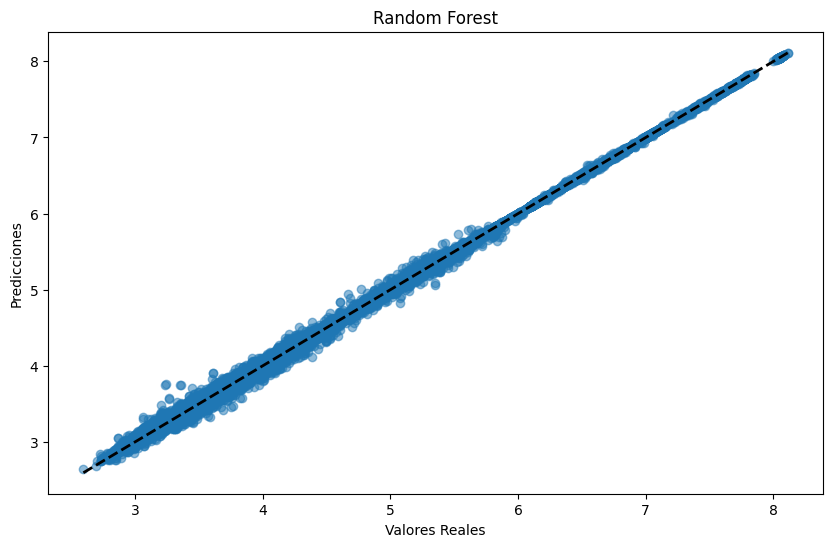

In [ ]:
plot_model_predictions(y_test, y_pred_test_rf, 'Random Forest')

In [ ]:
# Guardar el modelo
#pickle_dump(best_rf_model, './notebooks/pickle/best_RandomForest_model.pkl')

# Cargar el modelo
#best_rf_model = pickle_load('./notebooks/pickle/best_RandomForest_model.pkl')

## 6. XGBoost

In [ ]:
# Definir los parámetros para Grid Search
xgb_params = {
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 6, 9],
    'n_estimators': [100, 200, 300],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# Crear el pipeline para XGBoost
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)

# Crear GridSearchCV para XGBoost
xgb_grid = GridSearchCV(estimator=xgb_model, param_grid=xgb_params, scoring='r2', cv=5, n_jobs=-1, verbose=3)
xgb_grid.fit(X_train, y_train)

# Obtener los mejores parámetros y el mejor score
best_xgb_params = xgb_grid.best_params_
best_xgb_score = xgb_grid.best_score_

print("Mejores parámetros para XGBoost:", best_xgb_params)
print("Mejor puntaje R² para XGBoost:", best_xgb_score)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Mejores parámetros para XGBoost: {'colsample_bytree': 1.0, 'learning_rate': 0.2, 'max_depth': 9, 'n_estimators': 300, 'subsample': 1.0}
Mejor puntaje R² para XGBoost: 0.9980427366816886


In [ ]:
# Reentrenar XGBoost con los mejores parámetros
best_xgb_model = xgb_grid.best_estimator_

In [ ]:
# Predicciones en el conjunto de prueba
y_pred_best_test_xgb = best_xgb_model.predict(X_test)

# Calcular el MSE y R^2 para los modelos optimizados
mse_xgb_test = mean_squared_error(y_test, y_pred_best_test_xgb)
r2_xgb_test = r2_score(y_test, y_pred_best_test_xgb)

In [ ]:
# Predicciones en el conjunto de entrenamiento
y_pred_best_train_xgb = best_xgb_model.predict(X_train)

# Calcular el MSE y R^2 para los modelos optimizados
mse_xgb_train = mean_squared_error(y_train, y_pred_best_train_xgb)
r2_xgb_train = r2_score(y_train, y_pred_best_train_xgb)

In [ ]:
# Almacenamos la información del modelo
store_model_info('XGBoost', mse_xgb_train, mse_xgb_test, r2_xgb_train, r2_xgb_test)

Error cuadrático medio (entrenamiento): 0.001777420861495175
Error cuadrático medio (prueba): 0.0024012850669086062
Coeficiente de determinación R^2 (entrenamiento): 0.9986078410882211
Coeficiente de determinación R^2 (prueba): 0.9980956149754916


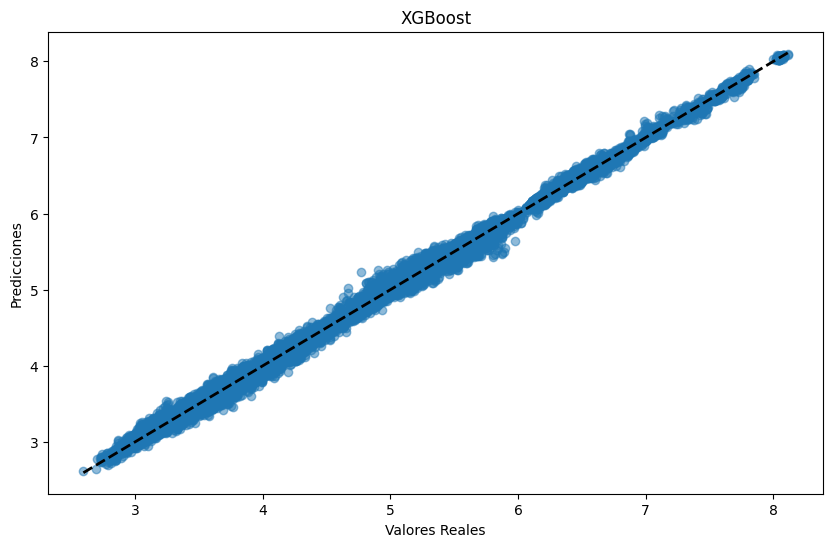

In [ ]:
plot_model_predictions(y_test, y_pred_best_test_xgb, 'XGBoost')

In [ ]:
# Guardar el modelo
#pickle_dump(best_xgb_model, './notebooks/pickle/best_XGBoost_model.pkl')

# Cargar el modelo
#best_xgb_model = pickle_load('./notebooks/pickle/best_XGBoost_model.pkl')

## 7. LightGBM

In [ ]:
# Definir los parámetros para Grid Search
lgb_params = {
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 6, 9],
    'n_estimators': [100, 200, 300],
    'num_leaves': [20, 31, 40],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# Crear el pipeline para LightGBM
lgb_model = lgb.LGBMRegressor(objective='regression', random_state=42)

# Crear GridSearchCV para LightGBM
lgb_grid = GridSearchCV(estimator=lgb_model, param_grid=lgb_params, scoring='r2', cv=5, n_jobs=-1, verbose=3)
lgb_grid.fit(X_train, y_train)

# Obtener los mejores parámetros y el mejor score
best_lgb_params = lgb_grid.best_params_
best_lgb_score = lgb_grid.best_score_

print("Mejores parámetros para LightGBM:", best_lgb_params)
print("Mejor puntaje R² para LightGBM:", best_lgb_score)

In [ ]:
# Reentrenar LightGBM con los mejores parámetros
best_lgb_model = lgb_grid.best_estimator_

In [ ]:
# Predicciones en el conjunto de prueba
y_pred_best_test_lgb = best_lgb_model.predict(X_test)

# Calcular el MSE y R^2 para los modelos optimizados
mse_lgb_test = mean_squared_error(y_test, y_pred_best_test_lgb)
r2_lgb_test = r2_score(y_test, y_pred_best_test_lgb)

In [ ]:
# Predicciones en el conjunto de entrenamiento
y_pred_best_train_lgb = best_lgb_model.predict(X_train)

# Calcular el MSE y R^2 para los modelos optimizados
mse_lgb_train = mean_squared_error(y_train, y_pred_best_train_lgb)
r2_lgb_train = r2_score(y_train, y_pred_best_train_lgb)

In [ ]:
# Almacenamos la información del modelo
store_model_info('LightGBM', mse_lgb_train, mse_lgb_test, r2_lgb_train, r2_lgb_test)

Error cuadrático medio (entrenamiento): 0.008760229237783513
Error cuadrático medio (prueba): 0.009234273046743778
Coeficiente de determinación R^2 (entrenamiento): 0.9931385799127238
Coeficiente de determinación R^2 (prueba): 0.9926765832408728


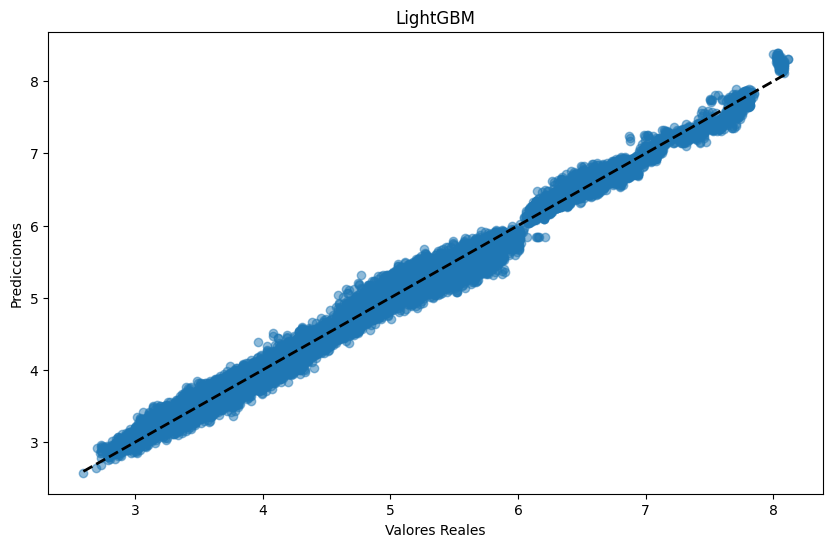

In [ ]:
plot_model_predictions(y_test, y_pred_best_test_lgb, 'LightGBM')

In [ ]:
# Guardar el modelo
#pickle_dump(best_lgb_model, './notebooks/pickle/best_LightGBM_model.pkl')

# Cargar el modelo
#best_lgb_model = pickle_load('./notebooks/pickle/best_LightGBM_model.pkl')

## 8. AdaBoost Regressor

In [ ]:
# Configurar el modelo AdaBoostRegressor
ada_params = {
    'n_estimators': [100, 200, 300],  # Número de estimadores base (árboles de decisión)
    'learning_rate': [0.01, 0.1],  # Tasa de aprendizaje del modelo
    'loss': ['linear', 'square', 'exponential']  # Función de pérdida
}

# Configurar el modelo AdaBoostRegressor
modelAdaBoost = AdaBoostRegressor(random_state=42)

# Configurar GridSearchCV
ada_grid = GridSearchCV(estimator=modelAdaBoost, param_grid=ada_params,
                           scoring='neg_mean_squared_error', cv=5, verbose=3, n_jobs=-1)

# Entrenar el modelo
ada_grid.fit(X_train, y_train)

# Obtener los mejores parámetros y el mejor score
best_ada_params = ada_grid.best_params_
best_ada_score = ada_grid.best_score_

print("Mejores parámetros para AdaBoost:", best_ada_params)
print("Mejor puntaje R² para AdaBoost:", best_ada_score)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV 1/5] END learning_rate=0.01, loss=linear, n_estimators=100;, score=-0.629 total time=  13.6s
[CV 2/5] END learning_rate=0.01, loss=linear, n_estimators=100;, score=-0.624 total time=  11.1s
[CV 3/5] END learning_rate=0.01, loss=linear, n_estimators=100;, score=-0.623 total time=  11.0s
[CV 4/5] END learning_rate=0.01, loss=linear, n_estimators=100;, score=-0.633 total time=  11.1s
[CV 5/5] END learning_rate=0.01, loss=linear, n_estimators=100;, score=-0.630 total time=  11.3s
[CV 1/5] END learning_rate=0.01, loss=linear, n_estimators=200;, score=-0.653 total time=  21.8s
[CV 2/5] END learning_rate=0.01, loss=linear, n_estimators=200;, score=-0.649 total time=  22.2s
[CV 3/5] END learning_rate=0.01, loss=linear, n_estimators=200;, score=-0.646 total time=  22.3s
[CV 4/5] END learning_rate=0.01, loss=linear, n_estimators=200;, score=-0.655 total time=  22.4s
[CV 5/5] END learning_rate=0.01, loss=linear, n_estimators=200;, s

In [ ]:
# Reentrenar ADABoost con los mejores parámetros
best_ada_model = ada_grid.best_estimator_

In [ ]:
# Predicciones en el conjunto de prueba
y_pred_best_test_ada = best_ada_model.predict(X_test)

# Calcular el MSE y R^2 para los modelos optimizados
mse_ada_test = mean_squared_error(y_test, y_pred_best_test_ada)
r2_ada_test = r2_score(y_test, y_pred_best_test_ada)

In [ ]:
# Predicciones en el conjunto de entrenamiento
y_pred_best_train_ada = best_ada_model.predict(X_train)

# Calcular el MSE y R^2 para los modelos optimizados
mse_ada_train = mean_squared_error(y_train, y_pred_best_train_ada)
r2_ada_train = r2_score(y_train, y_pred_best_train_ada)

In [ ]:
# Almacenamos información del modelo
store_model_info('ADA Boost', mse_ada_train, mse_ada_test, r2_ada_train, r2_ada_test)

Error cuadrático medio (entrenamiento): 0.38688424001926147
Error cuadrático medio (prueba): 0.3850789816501769
Coeficiente de determinación R^2 (entrenamiento): 0.6969742202099716
Coeficiente de determinación R^2 (prueba): 0.6946057525558027


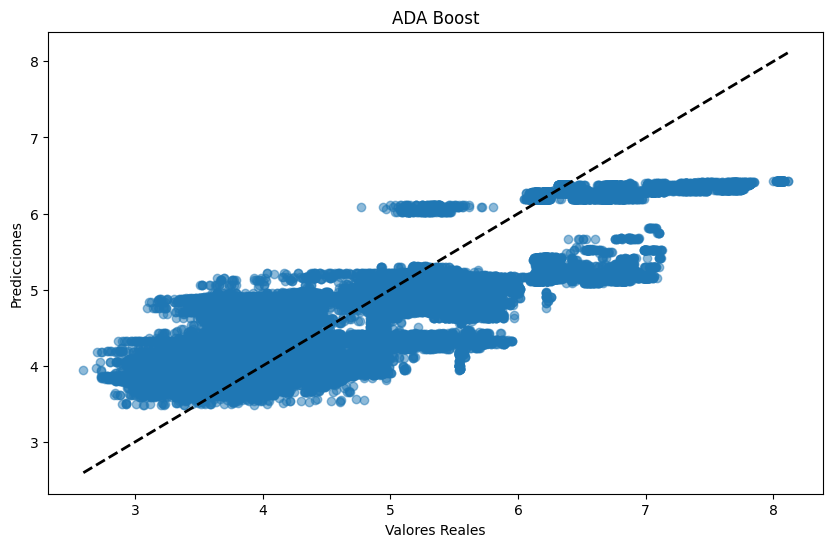

In [ ]:
plot_model_predictions(y_test, y_pred_best_test_ada, 'ADA Boost')

In [ ]:
# Guardar el modelo
#pickle_dump(best_ada_model, './notebooks/pickle/best_AdaBoost_model.pkl')

# Cargar el modelo
#best_ada_model = pickle_load('./notebooks/pickle/best_AdaBoost_model.pkl')

## 9. Bagging Regressor

In [ ]:
# Configurar el modelo BaggingRegressor
bag_params = {
    'n_estimators': [100, 300],  # Número de estimadores en el ensamble
    'max_samples': [0.5, 0.7],  # Proporción de muestras a extraer para cada estimador
    'max_features': [0.5],  # Proporción de características a extraer para cada estimador
    'random_state': [42]
}
# Parámetros para probar en futuras iteraciones
#bag_params = {
#    'base_estimator': [None],  # Estimador base (None para usar DecisionTreeRegressor por defecto)
#    'n_estimators': [50, 100, 200],  # Número de estimadores en el ensamble
#    'max_samples': [0.5, 0.7, 1.0],  # Proporción de muestras a extraer para cada estimador
#    'max_features': [0.5, 0.7, 1.0],  # Proporción de características a extraer para cada estimador
#    'bootstrap': [True, False],  # Si se extraen muestras con reemplazo
#    'bootstrap_features': [False],  # Si se extraen características con reemplazo
#    'oob_score': [False],  # Si se usa el score out-of-bag para estimar el R^2 en datos no vistos
#    'random_state': [42]  # Semilla aleatoria para reproducibilidad
#}

# Configurar el modelo BaggingRegressor
base_bagging = BaggingRegressor(random_state=42)
modelBagging = BaggingRegressor(estimator=base_bagging)

# Configurar GridSearchCV
bag_grid = GridSearchCV(estimator=modelBagging, param_grid=bag_params,
                           scoring='neg_mean_squared_error', cv=5, verbose=3)

# Entrenar el modelo
bag_grid.fit(X_train, y_train)

# Obtener los mejores parámetros y el mejor score
best_bag_params = bag_grid.best_params_
best_bag_score = bag_grid.best_score_

print("Mejores parámetros para Bagging:", best_bag_params)
print("Mejor puntaje R² para Bagging:", best_bag_score)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV 1/5] END max_features=0.5, max_samples=0.5, n_estimators=100, random_state=42;, score=-0.501 total time=  26.5s
[CV 2/5] END max_features=0.5, max_samples=0.5, n_estimators=100, random_state=42;, score=-0.495 total time=  25.6s
[CV 3/5] END max_features=0.5, max_samples=0.5, n_estimators=100, random_state=42;, score=-0.490 total time=  25.5s
[CV 4/5] END max_features=0.5, max_samples=0.5, n_estimators=100, random_state=42;, score=-0.493 total time=  25.7s
[CV 5/5] END max_features=0.5, max_samples=0.5, n_estimators=100, random_state=42;, score=-0.496 total time=  26.4s
[CV 1/5] END max_features=0.5, max_samples=0.5, n_estimators=300, random_state=42;, score=-0.537 total time= 1.3min
[CV 2/5] END max_features=0.5, max_samples=0.5, n_estimators=300, random_state=42;, score=-0.531 total time= 1.3min
[CV 3/5] END max_features=0.5, max_samples=0.5, n_estimators=300, random_state=42;, score=-0.525 total time= 1.3min
[CV 4/5] END

In [ ]:
# Reentrenar BaggingRegressor con los mejores parámetros
best_bag_model = bag_grid.best_estimator_

In [ ]:
# Predicciones en el conjunto de prueba
y_pred_best_test_bag = best_bag_model.predict(X_test)

# Calcular el MSE y R^2 para los modelos optimizados
mse_bag_test = mean_squared_error(y_test, y_pred_best_test_bag)
r2_bag_test = r2_score(y_test, y_pred_best_test_bag)

In [ ]:
# Predicciones en el conjunto de entrenamiento
y_pred_best_train_bag = best_bag_model.predict(X_train)

# Calcular el MSE y R^2 para los modelos optimizados
mse_bag_train = mean_squared_error(y_train, y_pred_best_train_bag)
r2_bag_train = r2_score(y_train, y_pred_best_train_bag)

In [ ]:
# Almacenamos información del modelo
store_model_info('Bag Regression', mse_bag_train, mse_bag_test, r2_bag_train, r2_bag_test)

Error cuadrático medio (entrenamiento): 0.4913256696799889
Error cuadrático medio (prueba): 0.488810908257088
Coeficiente de determinación R^2 (entrenamiento): 0.6151708216953367
Coeficiente de determinación R^2 (prueba): 0.6123391652538941


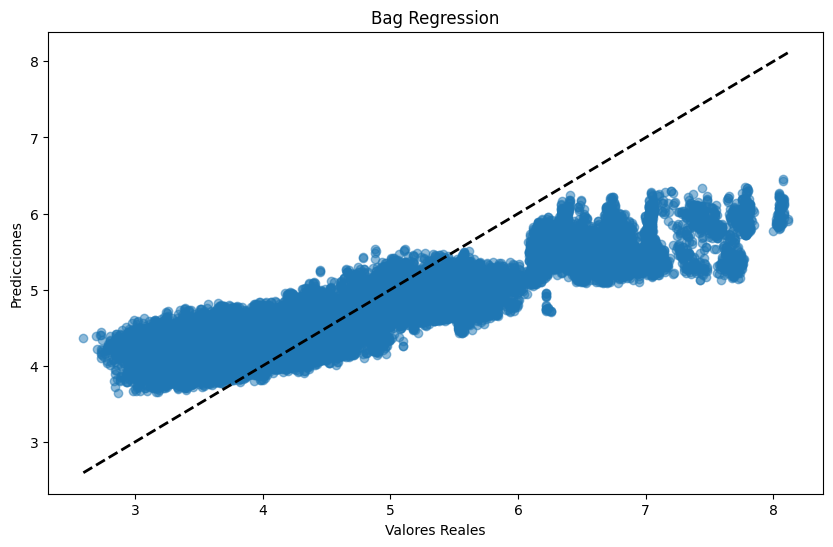

In [ ]:
plot_model_predictions(y_test, y_pred_best_test_bag, 'Bag Regression')

In [ ]:
# Guardar el modelo
#pickle_dump(best_bag_model, './notebooks/pickle/best_BaggingRegressor_model.pkl')

# Cargar el modelo
#best_bag_model = pickle_load('./notebooks/pickle/best_BaggingRegressor_model.pkl')

# Comparación de Modelos

Para cada modelo, tenemos el errores cuadrático medio (MSE) y el coeficiente de determinación para los datos de entrenamiento y de prueba:

In [ ]:
model_info_df = pd.DataFrame.from_dict(model_info, orient='index')
model_info_df

,ECM_train,ECM_test,R2_train,R2_test
Regresión Lineal,0.559146,0.557585,0.562051,0.557796
Regresión Ridge,0.559146,0.557585,0.562051,0.557796
Regresión Lasso,0.559167,0.557578,0.562035,0.557802
Regresión Polinómica,0.151298,0.151942,0.881496,0.879500
Random Forest,0.000102,0.000766,0.999920,0.999393
XGBoost,0.001777,0.002401,0.998608,0.998096
LightGBM,0.008760,0.009234,0.993139,0.992677
ADA Boost,0.386884,0.385079,0.696974,0.694606
Bag Regression,0.491326,0.488811,0.615171,0.612339


En el caso del ECM (Error Cuadrático Medio, o MSE en inglés), un valor menor es mejor. El ECM mide el promedio de los cuadrados de los errores, es decir, las diferencias cuadradas promedio entre los valores predichos y los valores reales. Por lo tanto, un ECM más bajo indica que el modelo tiene un mejor rendimiento en términos de precisión, ya que los errores de predicción son menores.

<Figure size 1400x600 with 0 Axes>

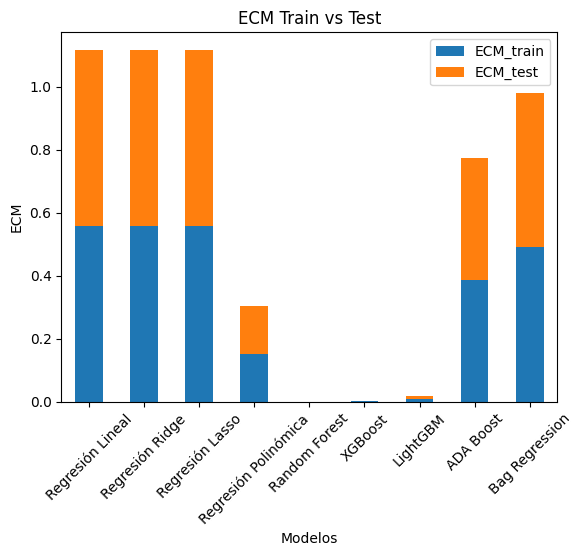

In [ ]:
# Gráfico de barras apiladas para ECM
plt.figure(figsize=(14, 6))
model_info_df[['ECM_train', 'ECM_test']].plot(kind='bar', stacked=True)
plt.title('ECM Train vs Test')
plt.xlabel('Modelos')
plt.ylabel('ECM')
plt.xticks(rotation=45)
plt.legend()
plt.show()

El R2, o coeficiente de determinación, mide la proporción de la variabilidad en la variable dependiente que es explicada por el modelo. Un valor de R2 cercano a 1 indica que el modelo explica bien la variabilidad de los datos, mientras que un valor cercano a 0 indica que el modelo no explica bien la variabilidad.

<Figure size 1400x600 with 0 Axes>

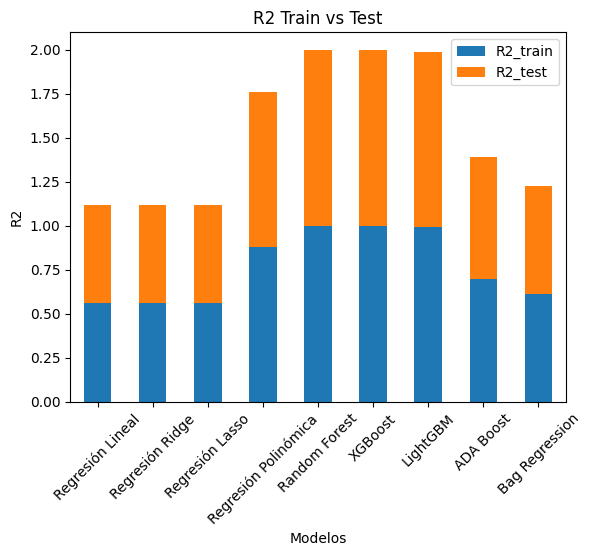

In [ ]:
# Gráfico de barras apiladas para R2
plt.figure(figsize=(14, 6))
model_info_df[['R2_train', 'R2_test']].plot(kind='bar', stacked=True)
plt.title('R2 Train vs Test')
plt.xlabel('Modelos')
plt.ylabel('R2')
plt.xticks(rotation=45)
plt.legend()
plt.show()

Aquí está la evaluación de los tres mejores modelos:

Random Forest:

*   Random Forest tiene errores extremadamente bajos y valores de R-cuadrado muy altos tanto en el entrenamiento como en el conjunto de prueba, lo que sugiere que tiene un rendimiento excepcional.

XGBoost:

*    XGBoost también muestra errores muy bajos y valores altos de R-cuadrado, indicando un fuerte rendimiento similar al de Random Forest.

LightGBM:

*   LightGBM tiene un rendimiento ligeramente inferior en términos de error en comparación con Random Forest y XGBoost, pero aún mantiene valores altos de R-cuadrado, lo que indica una buena capacidad predictiva.

Entre estos tres modelos (Random Forest, XGBoost y LightGBM), Random Forest destaca por tener el menor error y los valores más altos de R-cuadrado tanto en el entrenamiento como en el conjunto de prueba. Por lo tanto, basándonos en las métricas proporcionadas, Random Forest sería la opción principal debido a su rendimiento superior.